# AnanseScanpy vignette for multiomics PBMC dataset

PBMC multiomics datasets scanpy objects (anndata) generated from Seurat objects with SeuratDisk.
This vignette includes the optional functions for Maelstrom (GimmeMotifs) analysis.

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anansescanpy as asc

sc.set_figure_params(figsize=(4, 4))

/home/julian/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 7.0.0
anansescanpy        1.0.0
apport_python_hook  NA
backcall            0.1.0
cffi                1.15.1
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
decorator           4.4.2
entrypoints         0.3
h5py                3.7.0
ipykernel           5.2.0
ipython_genutils    0.2.0
ipywidgets          8.0.4
jedi                0.15.2
joblib              0.14.0
kiwisolver          1.0.1
llvmlite            0.39.1
logilab             NA
lz4                 3.0.2+dfsg
matplotlib          3.6.3
more_itertools      NA
mpl_toolkits        NA
natsort             8.2.0
netifaces           0.10.4
numba               0.56.4
numexpr             2.7.1
numpy               1.23.5
packaging           21.3
pandas              1.5.2
parso               0.5.2
pexpect             4.6.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      2.0.10
psutil              5.5

In [3]:
# Fill in the directories where the h5ad rna and atac objects are located
atac_PBMC = sc.read("atac_PBMC.h5ad")
rna_PBMC= sc.read("rna_PBMC.h5ad")

# Notes: the default assays for atac_PBMC and rna_PBMC are "peaks" and "counts" respectively

# Nessesary pre-processing from converted Seurat object
rna_PBMC.obs['predicted.id'] = rna_PBMC.obs['predicted.id'].str.replace(' ', '-')
atac_PBMC.obs['predicted.id'] = atac_PBMC.obs['predicted.id'].str.replace(' ', '-')

In [4]:
# Run the functions in python:
outputdir="AnanseScanpy_outs/"
contrasts=["B-naive_B-memory","B-memory_B-naive"]
minimal=25
asc.export_CPM_scANANSE(anndata=rna_PBMC,min_cells=minimal,outputdir=outputdir,
                        cluster_id="predicted.id"
)
asc.export_ATAC_scANANSE(anndata=atac_PBMC,min_cells=minimal,outputdir=outputdir,
                         cluster_id="predicted.id"
)
asc.config_scANANSE(anndata=rna_PBMC,min_cells=minimal,outputdir=outputdir,
                    cluster_id="predicted.id",additional_contrasts=contrasts
)
asc.DEGS_scANANSE(anndata=rna_PBMC,min_cells=minimal,outputdir=outputdir,
                  cluster_id="predicted.id",additional_contrasts=contrasts
)

/home/julian/.local/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


gather data from CD4-Naive with 1414 cells
gather data from CD4-TCM with 1592 cells
gather data from CD8-Naive with 1496 cells
gather data from CD16-Mono with 527 cells
gather data from NK with 492 cells
gather data from Treg with 160 cells
gather data from CD14-Mono with 3095 cells
gather data from CD8-TCM with 73 cells
gather data from B-intermediate with 351 cells
gather data from cDC2 with 168 cells
gather data from B-memory with 159 cells
gather data from CD4-TEM with 172 cells
gather data from MAIT with 121 cells
gather data from CD8-TEM with 664 cells
gather data from B-naive with 424 cells
gather data from gdT with 164 cells
gather data from pDC with 110 cells
gather data from HSPC with 26 cells
gather data from CD4-Naive with 1414 cells
gather data from CD4-TCM with 1592 cells
gather data from CD8-Naive with 1496 cells
gather data from CD16-Mono with 527 cells
gather data from NK with 492 cells
gather data from Treg with 160 cells
gather data from CD14-Mono with 3095 cells
gat

After running ANANSNAKE you can import back the results to the scanpy object 
and visualize a heatmap of the top factors with seaborn

In [5]:
# Generate a UMAP if not performed already during pre-processing
adata=rna_PBMC
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

In [6]:
# Import the Ananse results to the scanpy object and a separate dataframe as well
df_influence=asc.import_scanpy_scANANSE(anndata=rna_PBMC,cluster_id="predicted.id",
                       anansnake_inf_dir="AnanseScanpy_outs/influence/")

/home/julian/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [7]:
# Show the top 5 transcription factors for each population
top=5

df_t = df_influence.transpose()
factors_topn = []
for i in df_t:
    df_sub=df_t[i]
    test = df_sub.sort_values(ascending=False)
    print(i,": ",list(test[0:top].index))
    factors_topn.append(list(test[0:top].index))
    
factors_topn=[j for i in factors_topn for j in i]
factors_topn=set(factors_topn)

selected_df = df_influence[list(factors_topn)]

cDC2 :  ['SPI1', 'RBPJ', 'NR4A3', 'ETS2', 'RUNX2']
CD8-Naive :  ['LEF1', 'TCF7', 'BACH2', 'RUNX2', 'NR3C2']
B-memory :  ['EBF1', 'MEF2C', 'SPIB', 'BCL11A', 'NFKB2']
B-naive :  ['EBF1', 'REL', 'BACH2', 'PAX5', 'E2F5']
Treg :  ['LEF1', 'GATA3', 'FOXP3', 'HIVEP2', 'PRDM1']
gdT :  ['STAT4', 'RORA', 'MYBL1', 'EOMES', 'TBX21']
CD8-TCM :  ['STAT4', 'NR3C2', 'HIVEP2', 'ZNF76', 'GATA3']
CD16-Mono :  ['SPI1', 'MAFB', 'RXRA', 'REL', 'NR4A1']
CD8-TEM :  ['STAT4', 'RUNX3', 'MYBL1', 'EOMES', 'TBX21']
NK :  ['TBX21', 'XBP1', 'STAT4', 'RUNX3', 'EOMES']
CD4-TCM :  ['STAT5B', 'GATA3', 'HIVEP2', 'TCF7', 'MAF']
MAIT :  ['STAT4', 'EOMES', 'RUNX2', 'XBP1', 'RORA']
CD4-TEM :  ['STAT4', 'RORA', 'MAF', 'TCF7', 'NFATC2']
pDC :  ['SPIB', 'IRF4', 'CUX2', 'TCF4', 'CUX1']
B-intermediate :  ['EBF1', 'SPIB', 'REL', 'TCF4', 'BACH2']
CD14-Mono :  ['BACH1', 'CEBPD', 'SPI1', 'FOXO3', 'RBPJ']
CD4-Naive :  ['LEF1', 'TCF7', 'BACH2', 'HIVEP2', 'NR3C2']


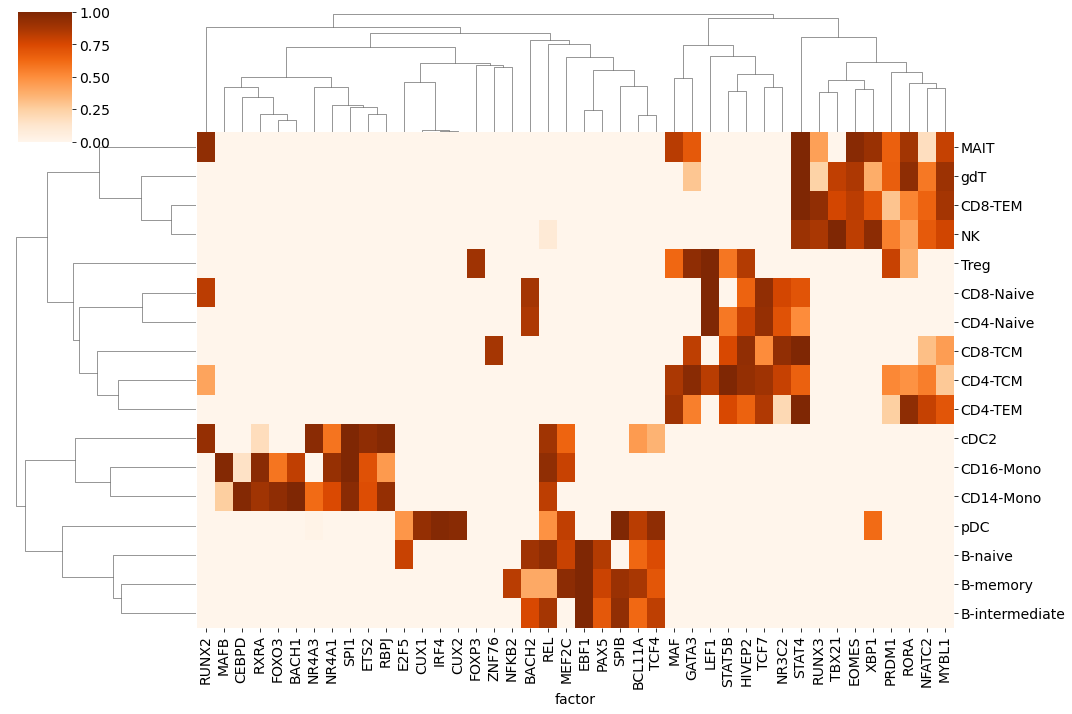

In [8]:
# Plot the heatmap of the top 5
sns.clustermap(selected_df, annot=False, figsize=(15, 10),cmap="Oranges")

/home/julian/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julian/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julian/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


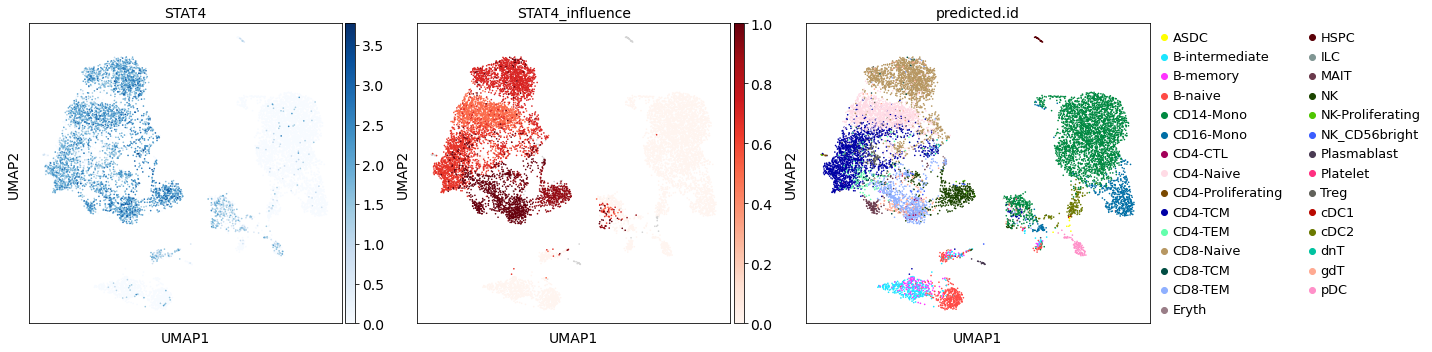

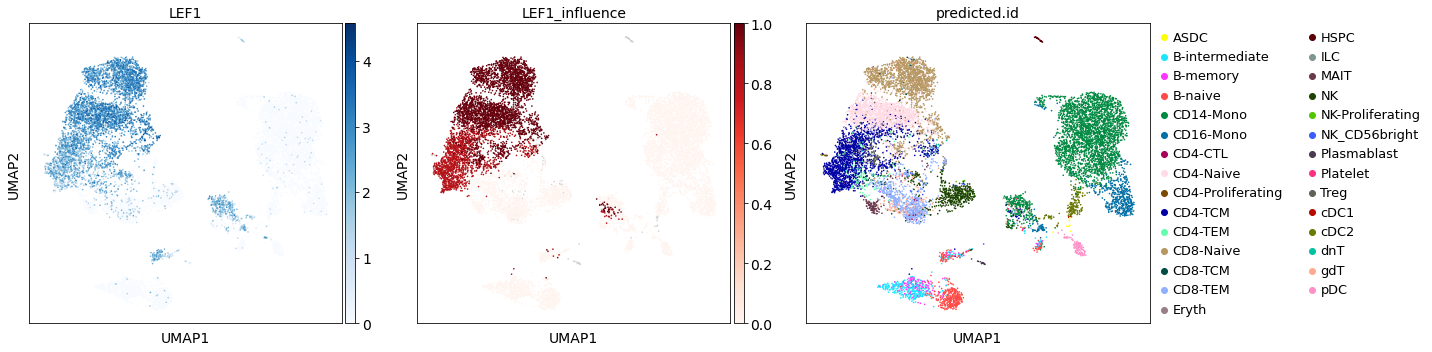

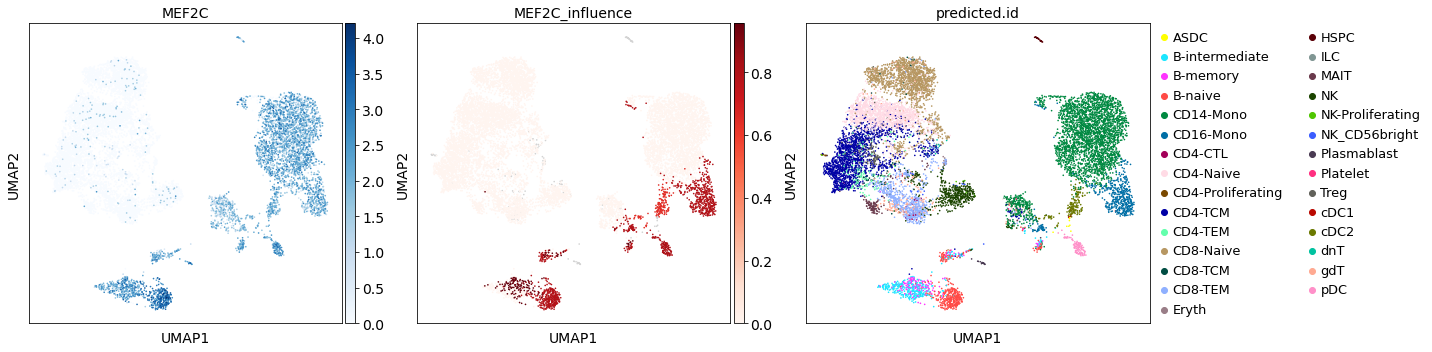

In [9]:
# Plot three TFs of interest upon the UMAP with expression and influence scores
for i in ["STAT4","LEF1","MEF2C"]:
    fig, axs = plt.subplots(1,3, figsize=(20,5))
    sc.pl.umap(adata, color=[i], cmap="Blues", 
        show = False,
        ax = axs[0])
    sc.pl.umap(adata, color=[str(i+"_influence")], cmap="Reds", 
        show = False,
        ax = axs[1])
    sc.pl.umap(adata, color=["predicted.id"], 
        show = False,
        ax = axs[2])
    plt.tight_layout()

<Figure size 800x400 with 0 Axes>

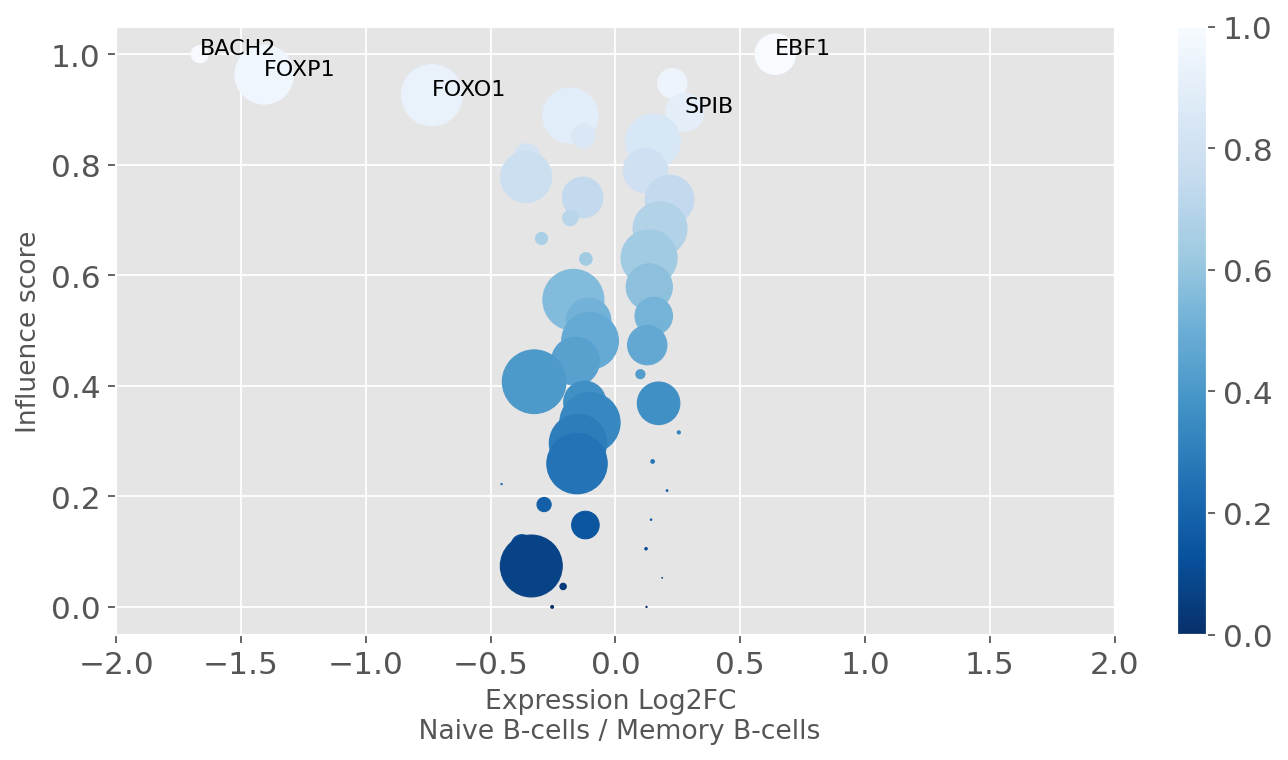

<Figure size 800x400 with 0 Axes>

In [10]:
# Plot the direct cluster-to-cluster comparison
sc.set_figure_params(figsize=(10, 5))

MemoryInfluence = pd.read_csv('AnanseScanpy_outs/influence/anansesnake_B-memory_B-naive.tsv',sep="\t",header=0)  
NaiveInfluence = pd.read_csv('AnanseScanpy_outs/influence/anansesnake_B-naive_B-memory.tsv',sep="\t",header=0)  
NaiveInfluence["factor_fc"] = NaiveInfluence["factor_fc"]* -1
NaiveInfluence

B_comparison = pd.concat([NaiveInfluence,MemoryInfluence])
B_comparison=B_comparison.reset_index()
B_comparison

plt.style.use("ggplot")
plt.scatter(B_comparison["factor_fc"],B_comparison["influence_score"],s=B_comparison["direct_targets"]*0.1,c=B_comparison["influence_score"], cmap='Blues_r')

# Naming and adding range to x-axis
plt.xlabel('Expression Log2FC \n Naive B-cells / Memory B-cells')
plt.ylabel('Influence score')
plt.xlim([-2, 2])
plt.colorbar()

# Add annotations
# Select factors with "factor_fc" > 0.26 and "factor_fc" < -0.5
selected_list= [i for i, x in enumerate(list(B_comparison["factor_fc"] > 0.26)) if x]+[i for i, x in enumerate(list(B_comparison["factor_fc"] < -0.5)) if x]

for i in selected_list:
    plt.annotate(B_comparison["factor"][int(i)], (B_comparison["factor_fc"][int(i)], B_comparison["influence_score"][int(i)]))

plt.figure()

Optional: after running ANANSNAKE you can import back the maelstrom results to the scanpy object

In [11]:
# Import the maelstrom results into the scanpy object
asc.import_scanpy_maelstrom(anndata=adata,cluster_id="predicted.id",
                       maelstrom_dir="AnanseScanpy_outs/maelstrom/")

/home/julian/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [12]:
# Make a dataframe with the values per cluster from the scanpy object, like df_mael above:
df_maelstrom = asc.per_cluster_df(anndata=adata,assay="maelstrom",cluster_id = "predicted.id") 
df_maelstrom.head()

,GM.5.0.GATA.0029_maelstrom,GM.5.0.T-box.0010_maelstrom,GM.5.0.RFX.0007_maelstrom,GM.5.0.GATA.0018_maelstrom,GM.5.0.Homeodomain.0112_maelstrom,GM.5.0.C2H2_ZF.0240_maelstrom,GM.5.0.C2H2_ZF.0081_maelstrom,GM.5.0.C2H2_ZF.0209_maelstrom,GM.5.0.Unknown.0070_maelstrom,GM.5.0.C2H2_ZF.0003_maelstrom,...,GM.5.0.Homeodomain.0178_maelstrom,GM.5.0.C2H2_ZF.0024_maelstrom,GM.5.0.C2H2_ZF.0149_maelstrom,GM.5.0.GATA.0004_maelstrom,GM.5.0.Homeodomain.0119_maelstrom,GM.5.0.Homeodomain.0142_maelstrom,GM.5.0.C2H2_ZF.0259_maelstrom,GM.5.0.Unknown.0191_maelstrom,GM.5.0.Mixed.0080_maelstrom,GM.5.0.Unknown.0124_maelstrom
CD4-Naive,-3.158720,0.987206,-2.277142,-2.157599,0.899880,-1.159911,-1.746293,-0.719396,0.212972,0.890589,...,1.479400,4.803352,-0.168118,2.045893,0.757803,0.819696,0.075058,-2.712276,1.193752,-0.678583
CD4-TCM,-2.779715,1.403722,-1.754961,-0.619564,0.363578,-1.250483,-1.536671,0.403295,1.653069,0.760212,...,0.604511,5.277779,-0.296064,2.900595,0.326848,1.297546,0.713357,-0.849734,0.984331,-2.323999
CD8-Naive,-3.666792,0.658251,-0.741593,-0.943449,0.527284,-0.329431,-0.719806,-0.093785,0.230939,-0.407383,...,1.216132,4.953860,-0.612817,1.811724,2.425492,1.613827,1.050873,-2.125865,0.258764,-0.404407
CD16-Mono,4.178187,-1.309968,0.798259,0.898081,-0.401259,-1.429248,0.410906,0.241499,-0.418713,-0.746905,...,-0.080583,-4.045632,1.540182,-2.799684,-0.703423,0.506031,-0.637716,1.222093,-0.247124,1.905879
NK,-2.281777,2.757341,-0.058953,-0.268780,-0.263754,3.122363,2.424381,-1.519505,-0.159066,-0.230792,...,0.173359,-1.550070,0.102610,1.737805,-1.272585,-0.620623,-0.124345,-0.011337,0.930425,-0.624942


In [13]:
# Link motifs to transcription factors specified with "combine_motifs" parameter. 
# Here, the maximum correlation of all motifs will be used (other options include: max_var and max_cor; see help)

adata=asc.Maelstrom_Motif2TF(anndata=adata,cluster_id = 'predicted.id',
                             maelstrom_dir= "AnanseScanpy_outs/maelstrom/",
                             combine_motifs="max_cor",save_output= True
)

loading maelstrom values from maelstrom assay using the cluster identifier predicted.id


/home/julian/.local/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


Seurat NormalizeData with default settings will be run on all the genes
Only keep motif-TF combinations with an R > 0.3
total length m2f_df_unique 625
Selecting correlating TFs
total m2f: 343
Motif best (absolute)correlated to expression is selected per TF


/home/julian/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/julian/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


Selecting anticorrelating TFs
total m2f: 282
Motif best (absolute)correlated to expression is selected per TF


/home/julian/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/julian/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


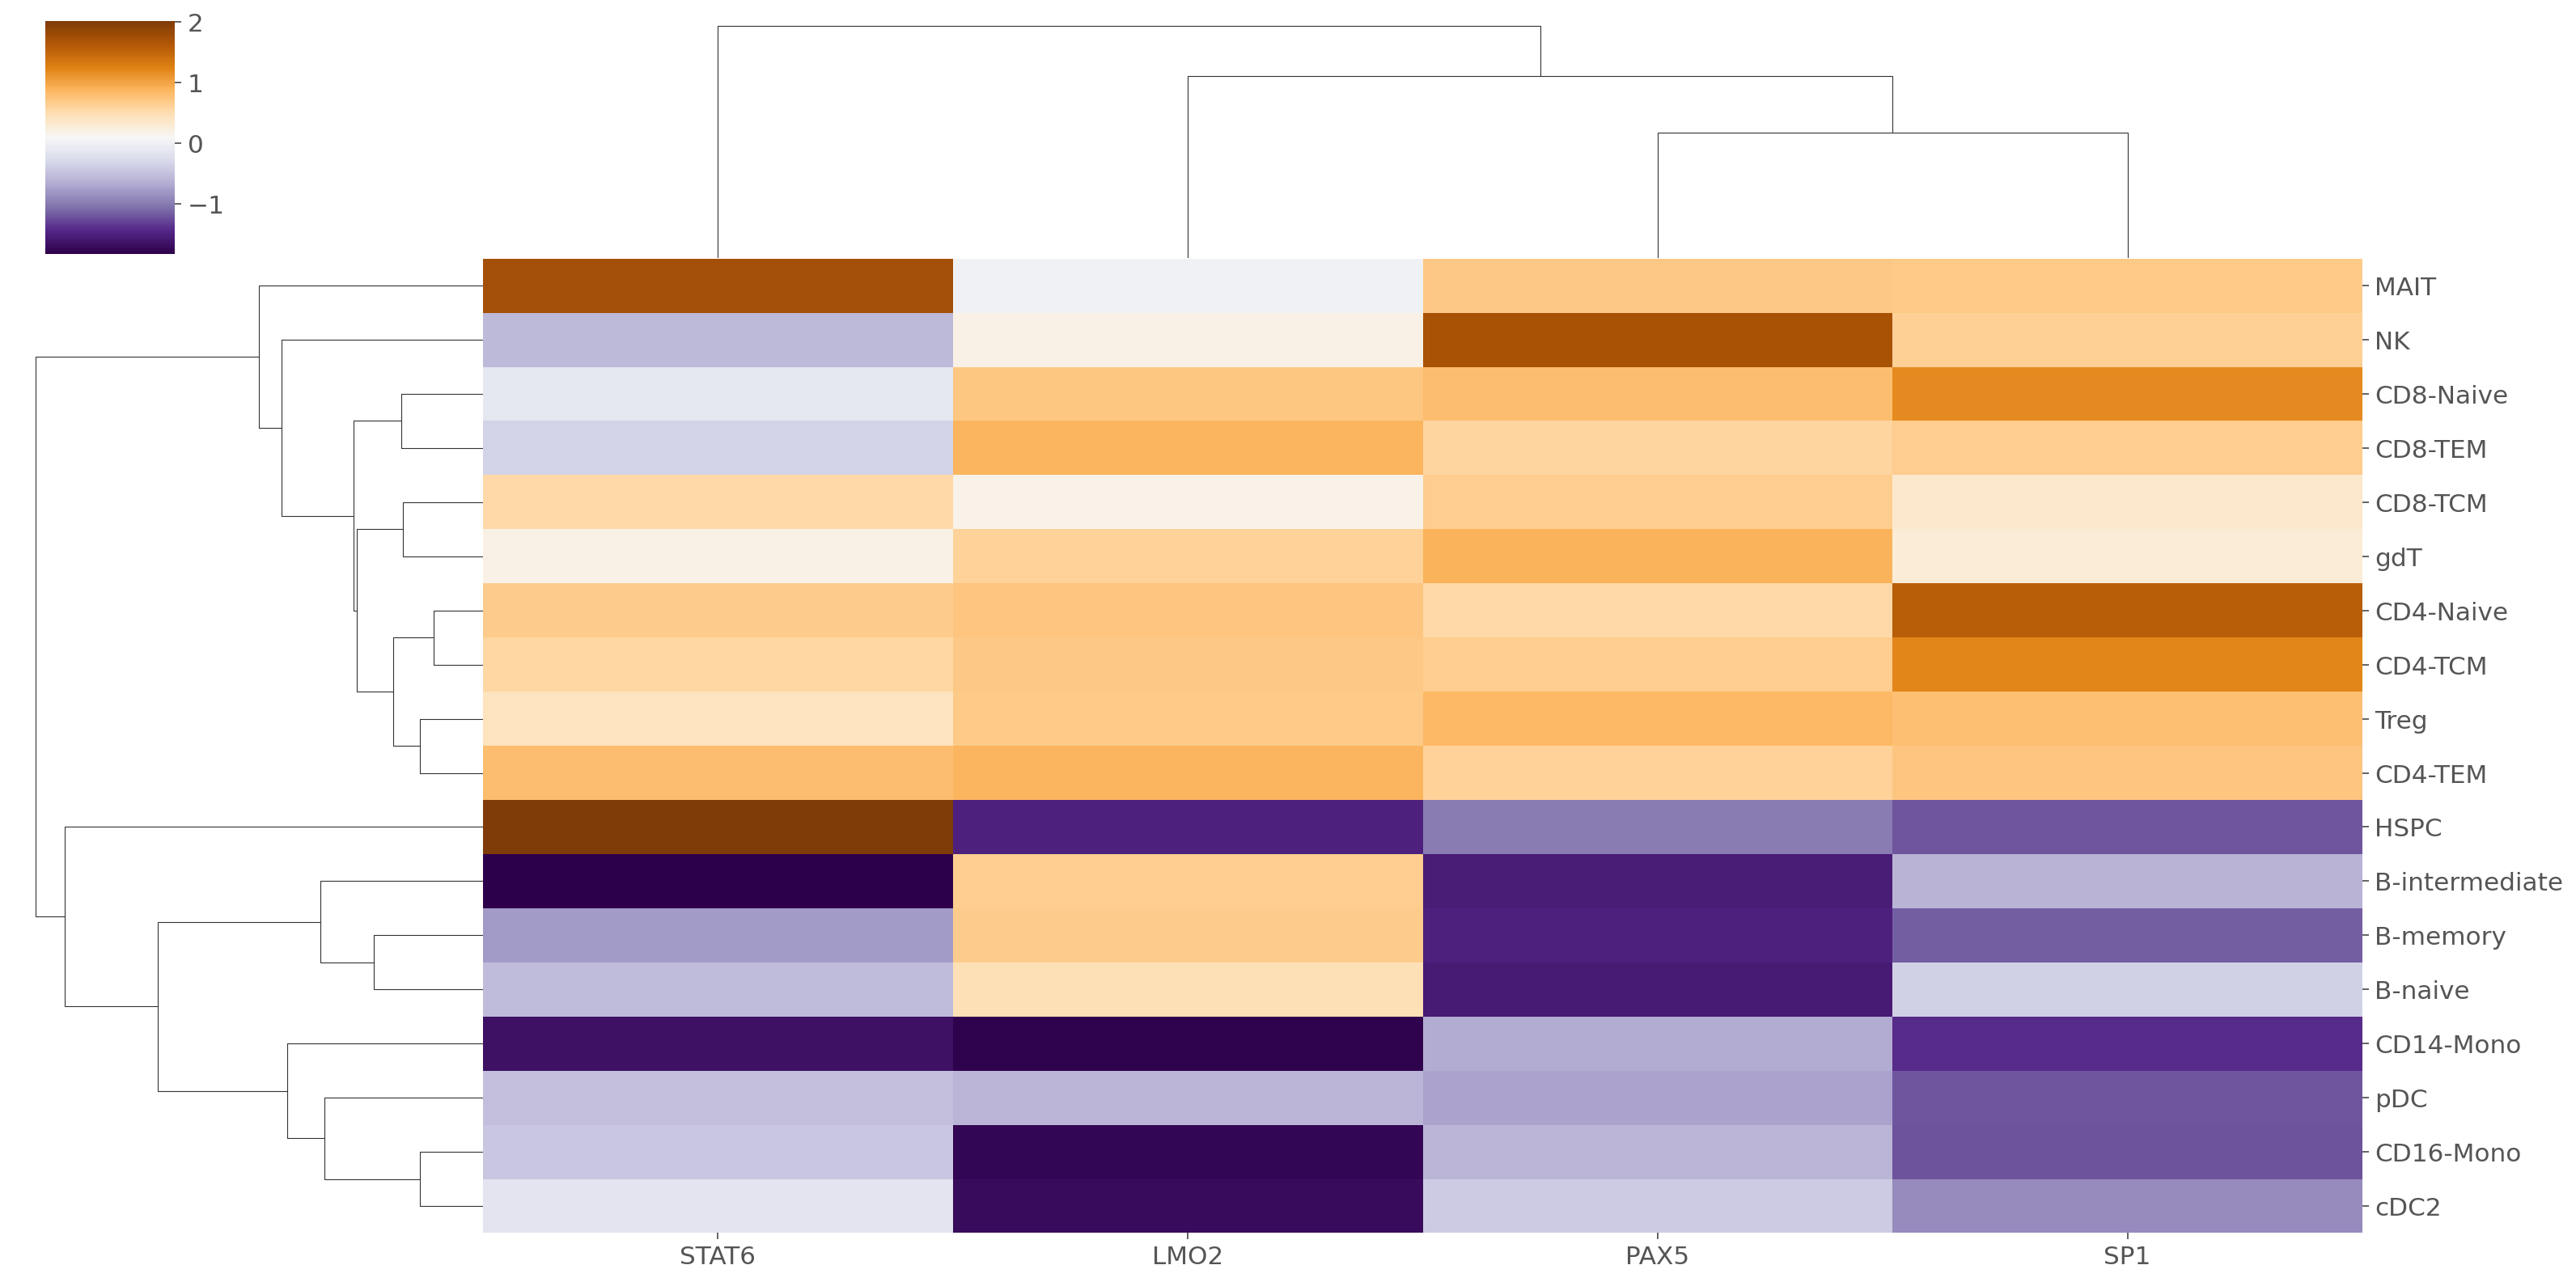

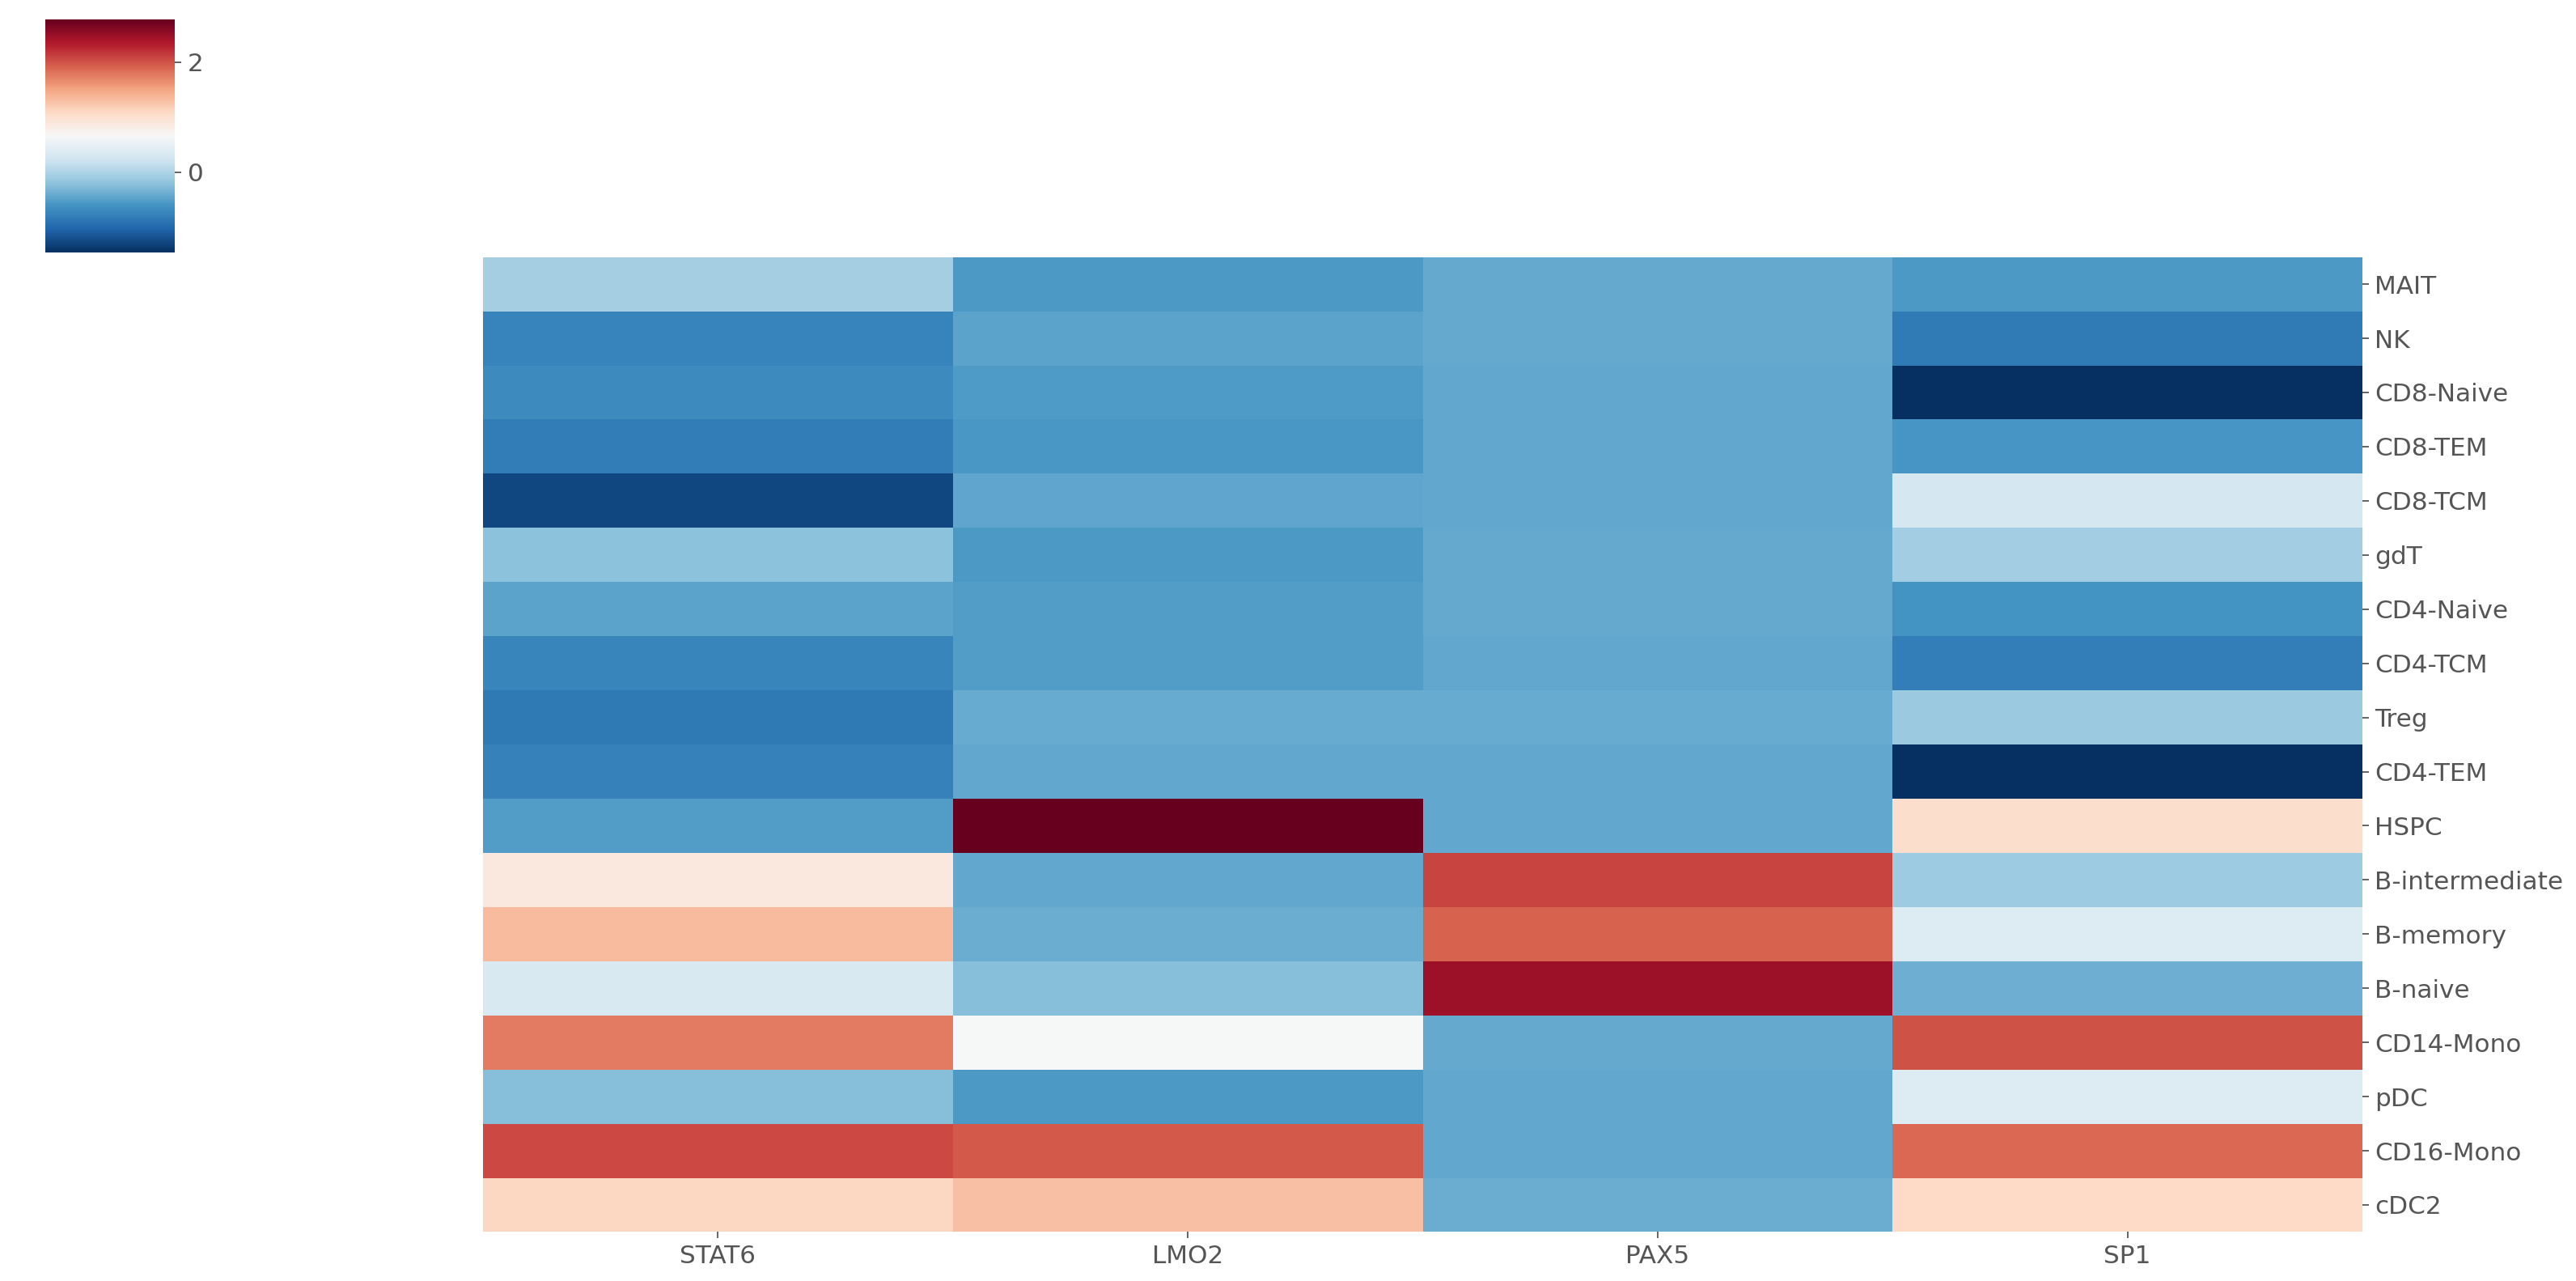

In [14]:
# Plotting the motif score heatmaps and the relative expression of top negative correlating motifs
df_anticor = asc.per_cluster_df(anndata=adata,assay="TFanticor_score",cluster_id = "predicted.id")

# Take a number of factors of interest or otherwise a top n factors:
factors_topn = ["PAX5","STAT6","LMO2","SP1"]
factors_topn2=pd.Series(str(s) + '_TFanticor_score' for s in factors_topn)
selected_df=df_anticor[factors_topn2]
factors_topn2= factors_topn2.str.removesuffix('_TFanticor_score')
selected_df.columns = factors_topn2

df_expression = asc.per_cluster_df(anndata=adata,assay="TFanticor_expression_score",cluster_id = "predicted.id")

factors_topn3=[str(s) + '_TFanticor_expression_score' for s in factors_topn]

selected_df2 = df_expression[factors_topn3]

# Remove assay suffixes from scanpy objects
factors_topn3=pd.Series(factors_topn3)
factors_topn3= factors_topn3.str.removesuffix('_TFanticor_expression_score')
selected_df2.columns = factors_topn3

# Plot the relative motif score map
res=sns.clustermap(selected_df, annot=False, figsize=(20, 10),cmap="PuOr_r")

# reorder heatmaps according to the other one above
selected_df2=selected_df2[list(selected_df.columns[res.dendrogram_col.reordered_ind])]
selected_df2=selected_df2.reindex(list(selected_df.index[res.dendrogram_row.reordered_ind]))

# Plot the relative expression score map
sns.clustermap(selected_df2, annot=False, figsize=(20, 10),col_cluster=False,row_cluster=False,cmap="RdBu_r")

# Note: the ETS1 motif shows high repression score for CD8 like cell types, like on the UMAP above

# Note: PAX5 is an important repressive factor in B-cells, also indiciated in our heatmap
# Source: Delogu A, Schebesta A, Sun Q, Aschenbrenner K, Perlot T, Busslinger M. 
# Gene repression by Pax5 in B cells is essential for blood cell homeostasis and is reversed in plasma cells. 
# Immunity. 2006 Mar;24(3):269-81. doi: 10.1016/j.immuni.2006.01.012. PMID: 16546096

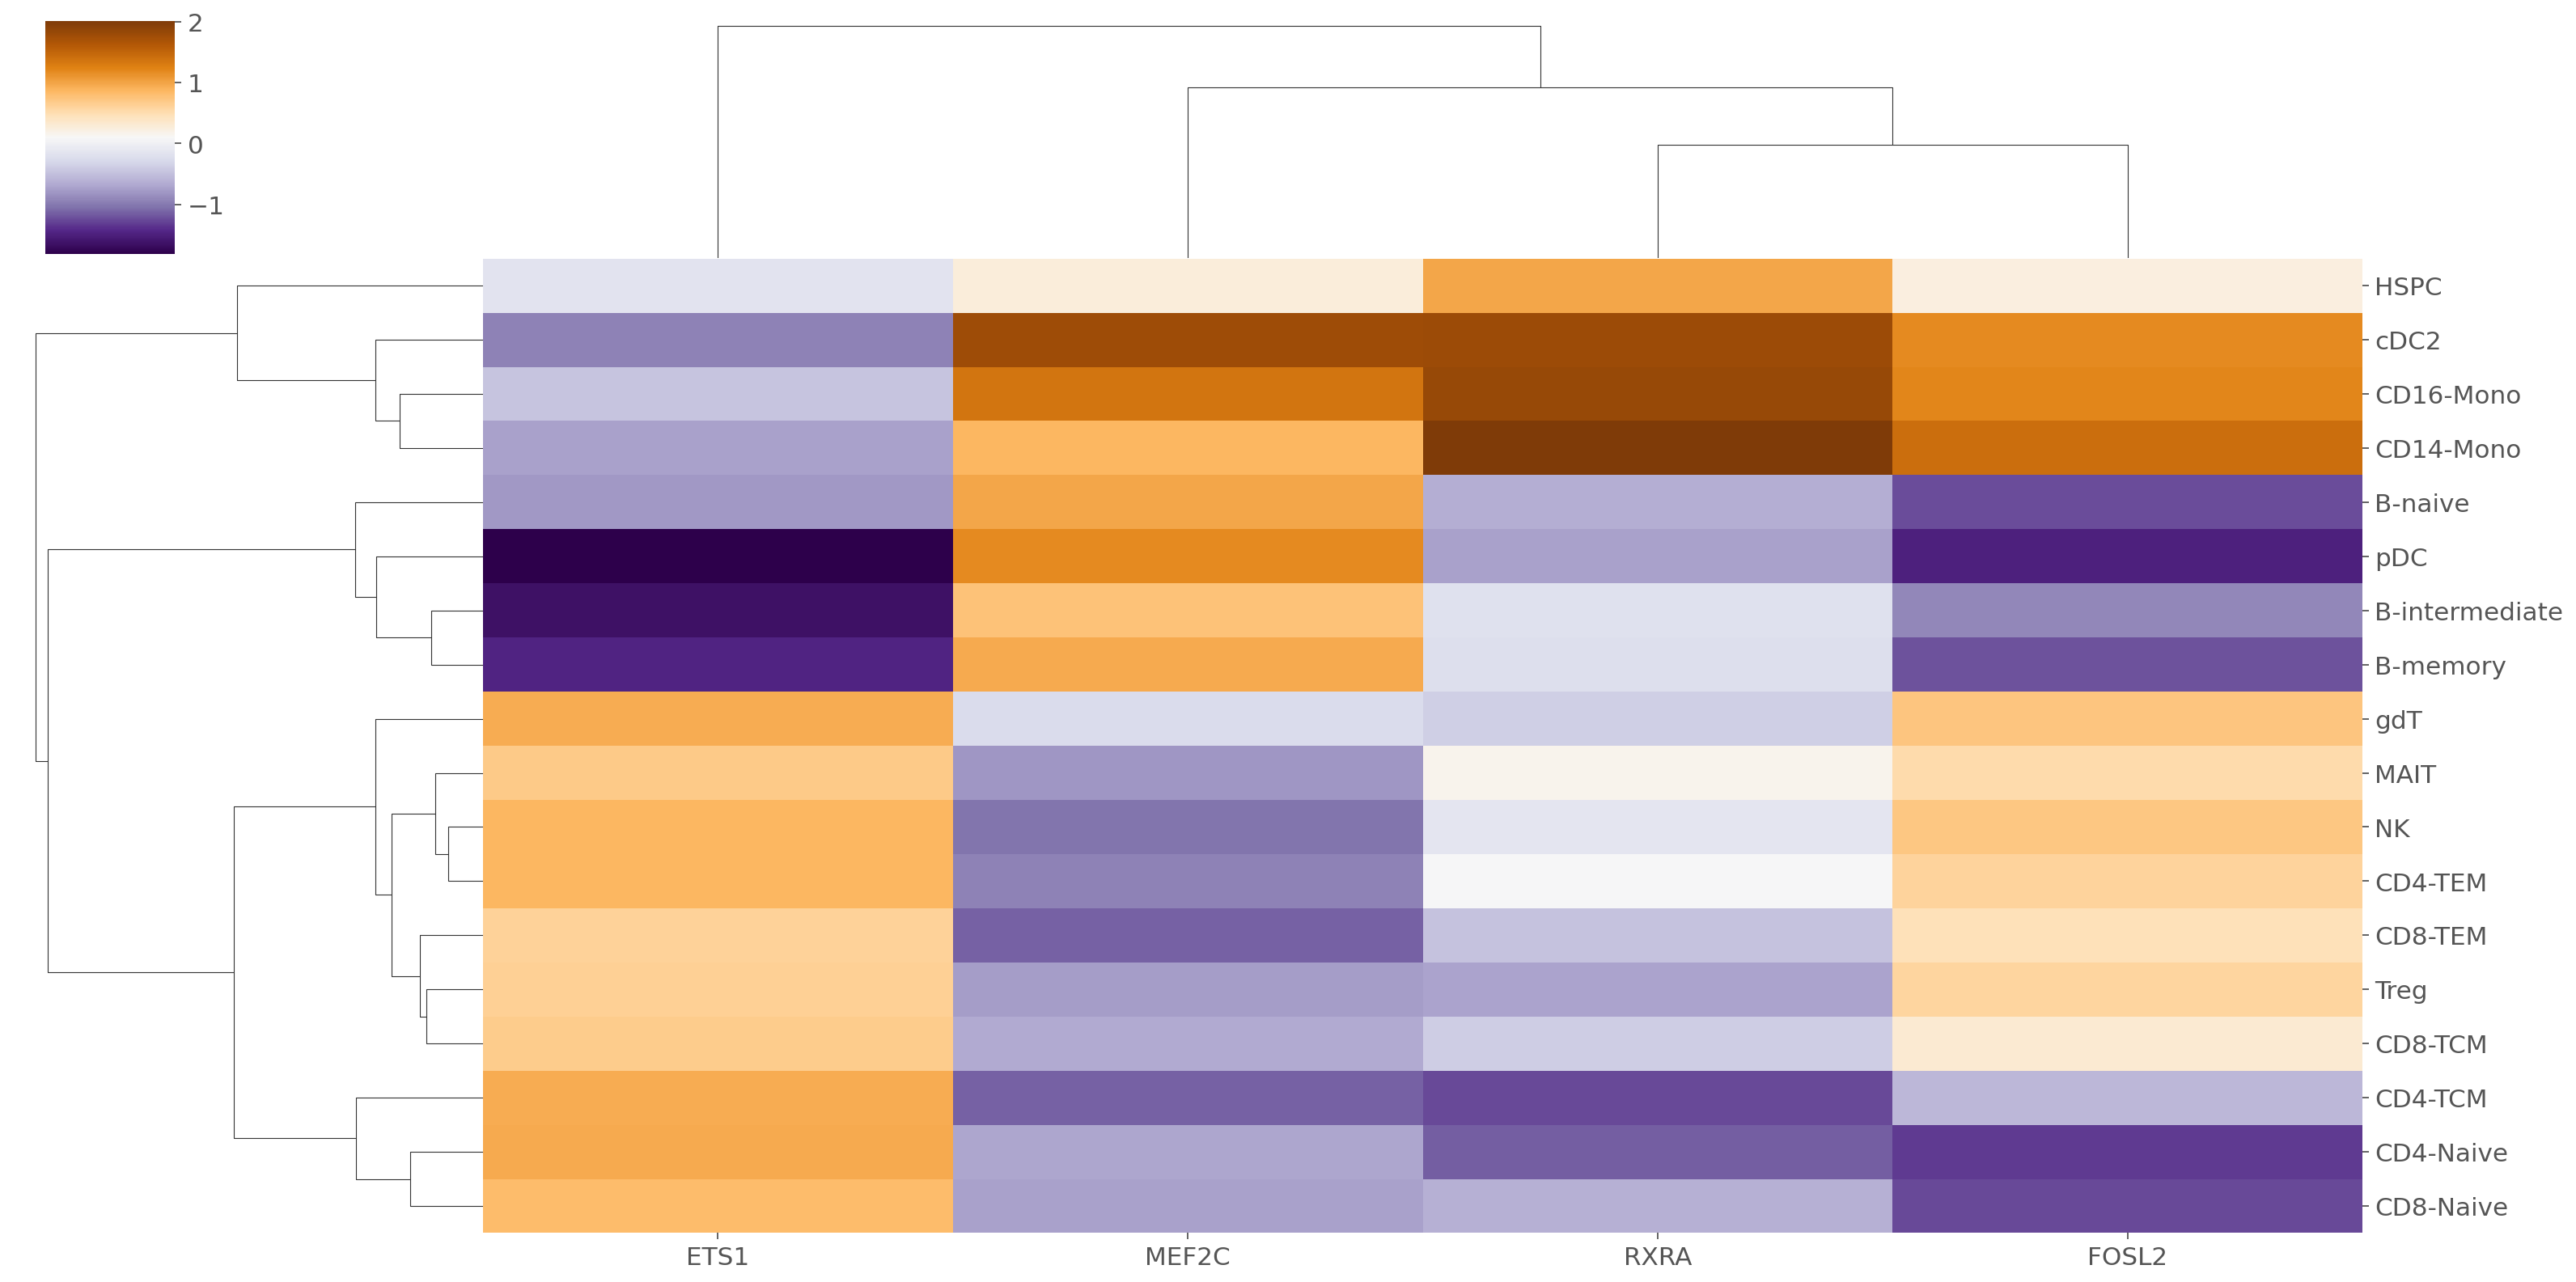

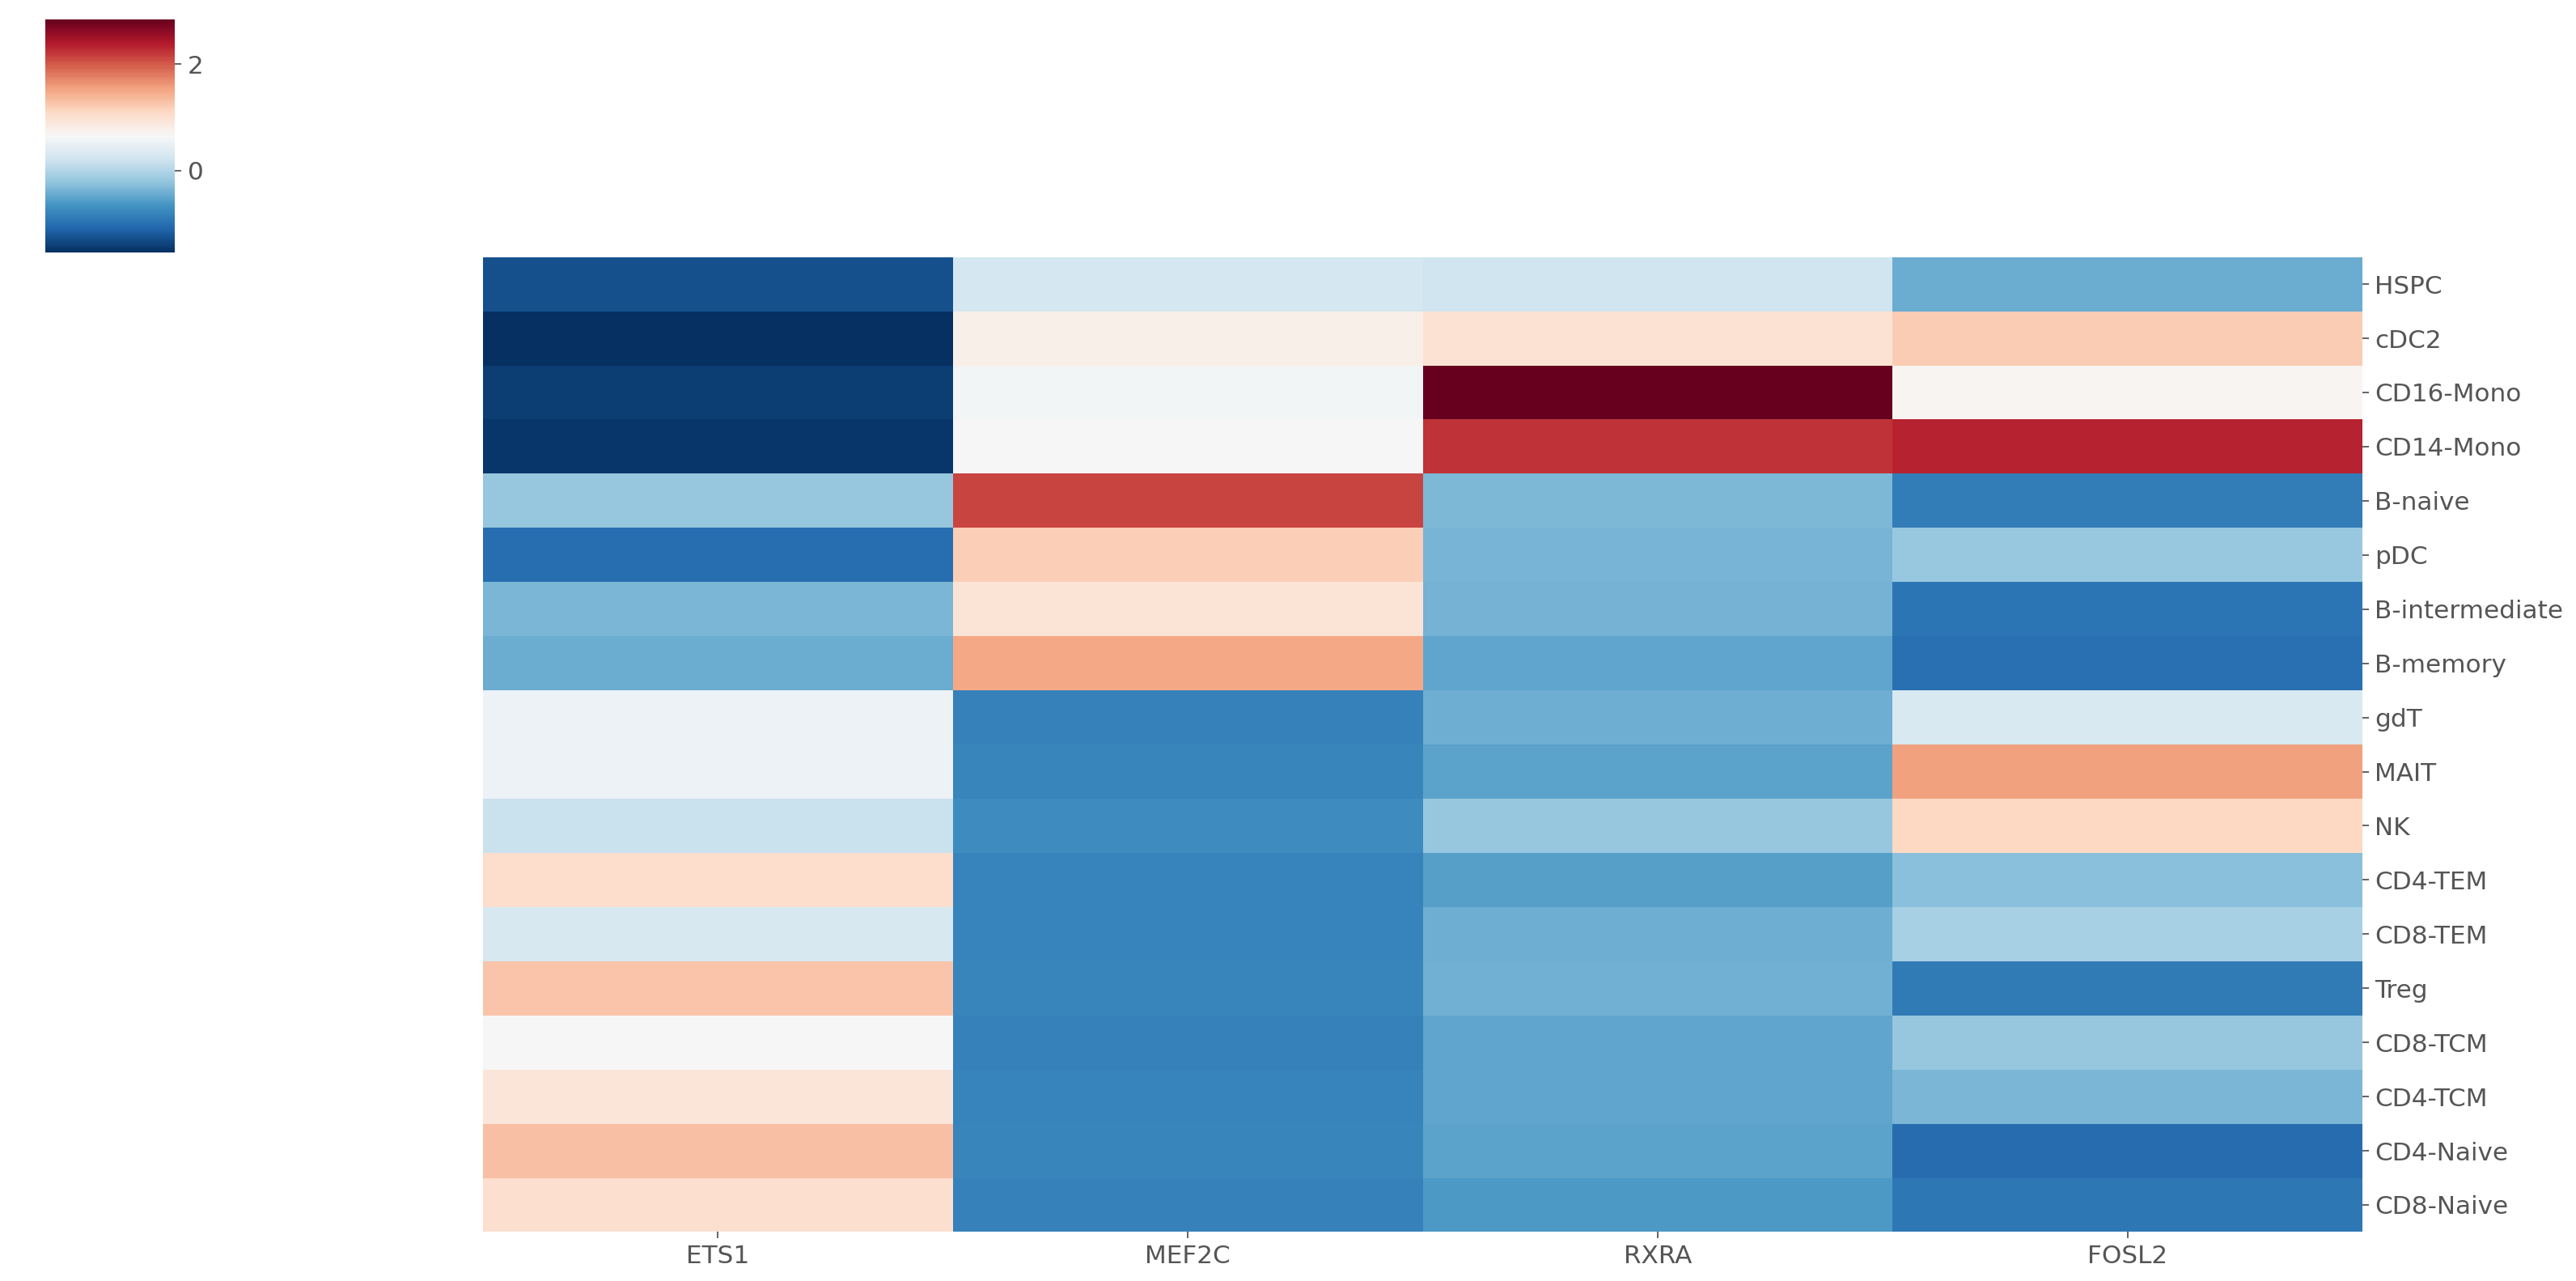

In [15]:
# Plotting the motif score heatmaps and the relative expression of top positive correlating motifs
df_cor = asc.per_cluster_df(anndata=adata,assay="TFcor_score",cluster_id = "predicted.id")

# Take a number of factors of interest or otherwise a top n factors:
factors_topn = ["MEF2C","ETS1","RXRA","FOSL2"]
factors_topn2=pd.Series(str(s) + '_TFcor_score' for s in factors_topn)
selected_df=df_cor[factors_topn2]
factors_topn2= factors_topn2.str.removesuffix('_TFcor_score')
selected_df.columns = factors_topn2

df_expression = asc.per_cluster_df(anndata=adata,assay="TFcor_expression_score",cluster_id = "predicted.id")

factors_topn3=[str(s) + '_TFcor_expression_score' for s in factors_topn]

selected_df2 = df_expression[factors_topn3]

# Remove assay suffixes from scanpy objects
factors_topn3=pd.Series(factors_topn3)
factors_topn3= factors_topn3.str.removesuffix('_TFcor_expression_score')
selected_df2.columns = factors_topn3

# Plot the relative motif score map
res=sns.clustermap(selected_df, annot=False, figsize=(20, 10),cmap="PuOr_r")

# reorder heatmaps according to the other one above
selected_df2=selected_df2[list(selected_df.columns[res.dendrogram_col.reordered_ind])]
selected_df2=selected_df2.reindex(list(selected_df.index[res.dendrogram_row.reordered_ind]))

# Plot the relative expression score map
sns.clustermap(selected_df2, annot=False, figsize=(20, 10),col_cluster=False,row_cluster=False,cmap="RdBu_r")

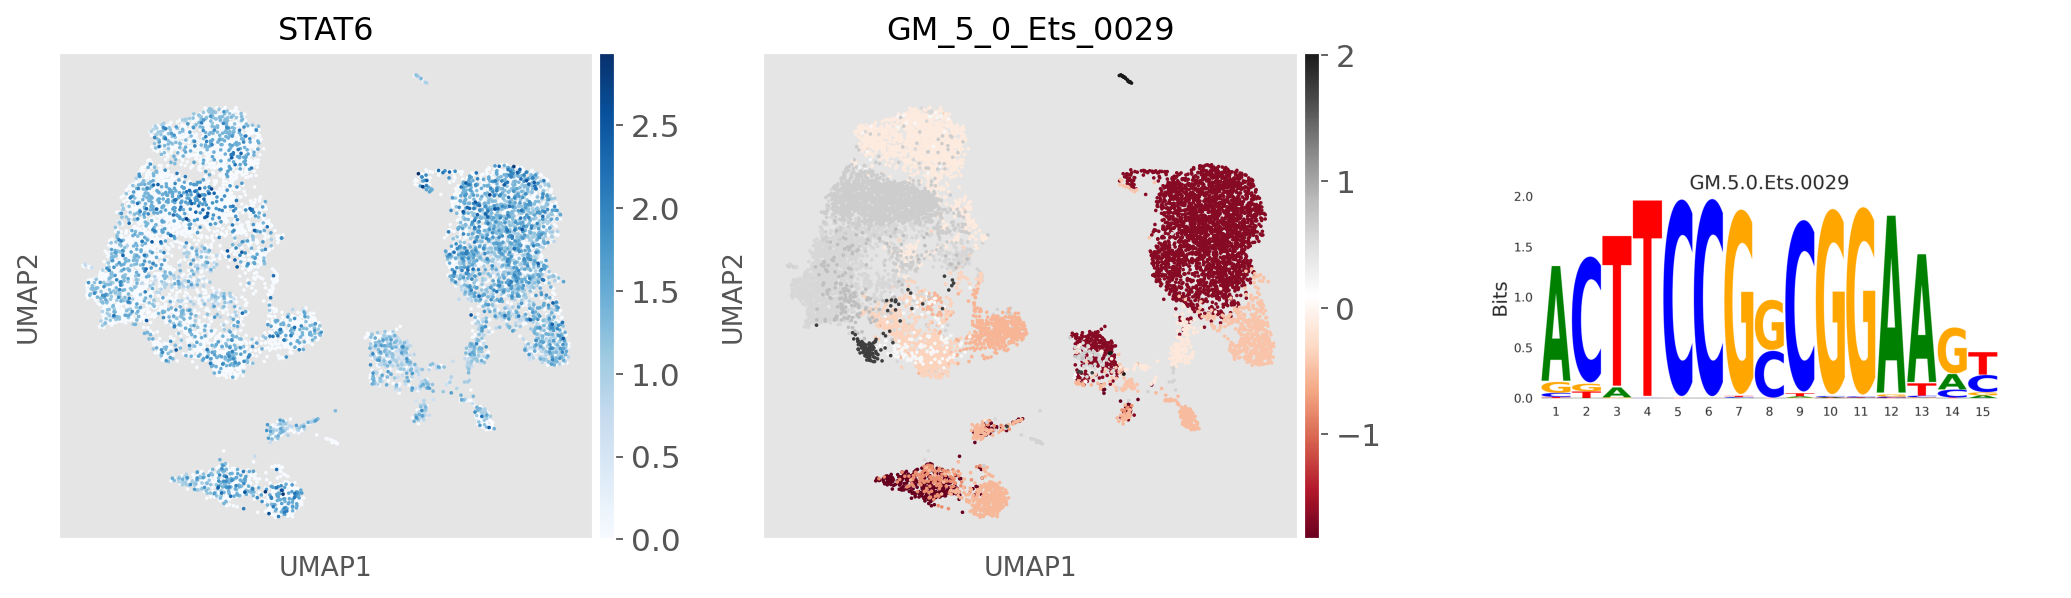

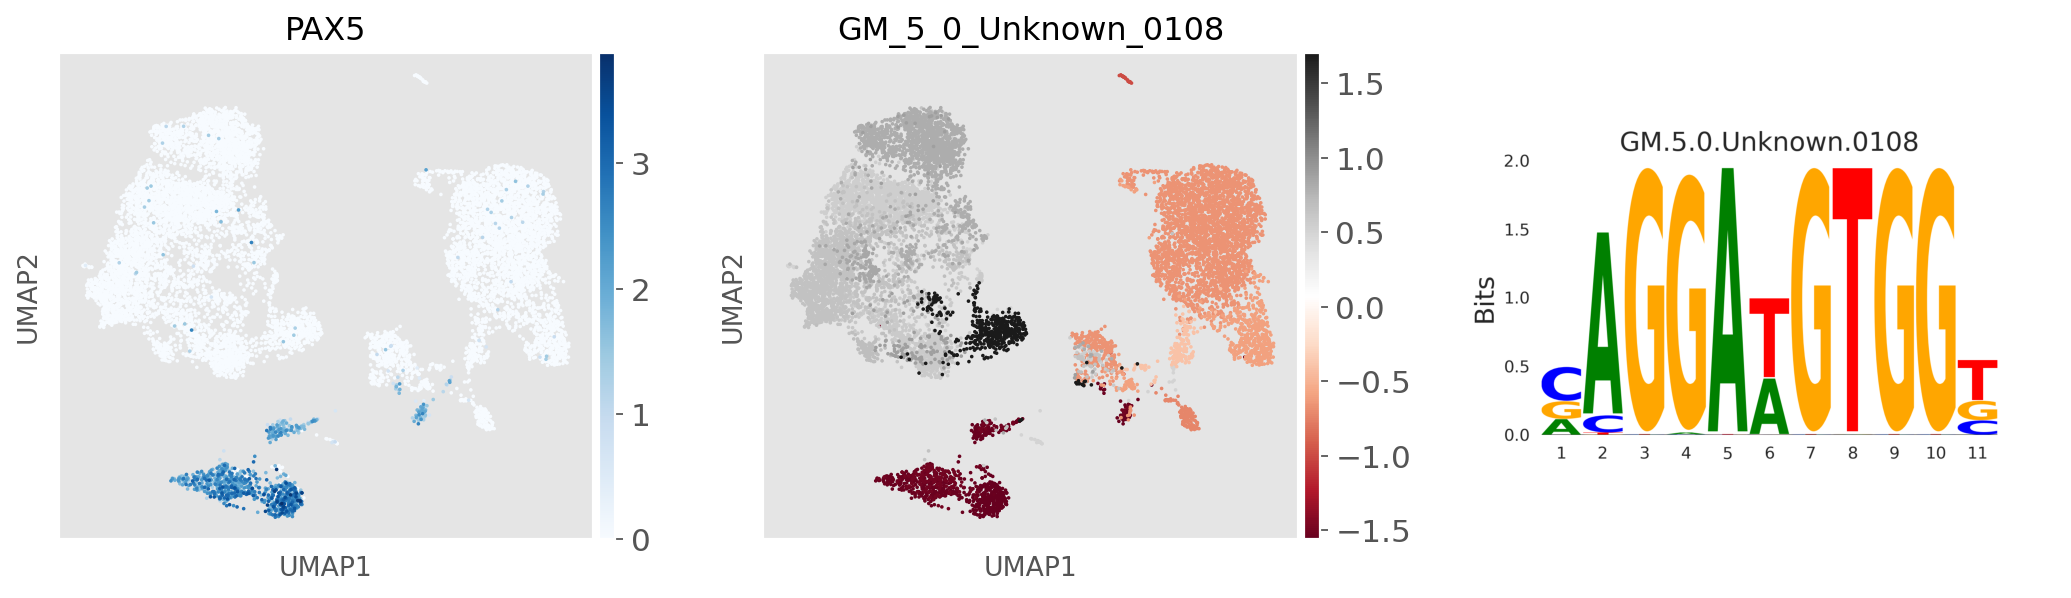

In [16]:
# Showing the negative correlating factors of interest with "max_cor" as the default "combine_motifs" parameter

TF_list = ["STAT6","PAX5"]
asc.Factor_Motif_Plot(adata,factor_list=TF_list,logo_dir='AnanseScanpy_outs/maelstrom/logos/',assay_maelstrom = 'TFanticor')